# Checking the output of the travel-time grids

## Plot the velocity grid

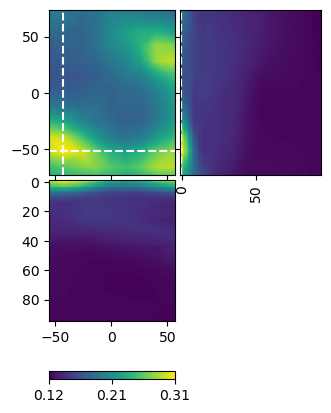

In [1]:
from nllgrid import NLLGrid

# Define the output filename of Vel2Grid or Vel2Grid3D 
wave = 'P' # 'S'
#grdfile = f"/Users/lpapin/Documents/phd/projects/sw4/nonlinloc/NLLoc/model/layer.{wave}.mod"
grdfile = f"/Users/lpapin/Downloads/layer.{wave}.mod"
grd = NLLGrid(grdfile)

# Plot with changing the max of the colobar
grd.plot(slice_index='max')

In [2]:
# Details of the grid
print(grd)

basename: /Users/lpapin/Downloads/layer.P.mod
nx: 111 ny: 146 nz: 95
x_orig: -55.0 y_orig: -72.5 z_orig: -1.0
dx: 1.0 dy: 1.0 dz: 1.0
grid_type: SLOW_LEN
float_type: FLOAT
transform: TRANSFORM  LAMBERT RefEllipsoid WGS-84  LatOrig 48.650000  LongOrig -123.750000  FirstStdParal 48.000000  SecondStdParal 49.300000  RotCW 0.000000


## Check the projection and coordinates of the stations

The log data is just a copy/paste of what comes out of the Grid2Time command. It helps checking the velocities but mostly how the coordinates went from x and y in km, in lat/lon with the projection written in the runfile.

In [14]:
# Log data (paste your full log here)
log_data = '''

Calculating travel times for source: BPCB  X 3.3348  Y 30.4297  Z -0.0310 (lat/lon/depth  48.923643  -123.704492  -0.031000) ...
Source:  Velocity: 5.030000 km/sec  GridLoc: ix=58.334839 iy=102.929741 iz=0.969000
Finished calculation, time grid output files: ./time/layer.P.BPCB.*

Calculating travel times for source: GLBC  X 8.4200  Y -28.2399  Z -0.1000 (lat/lon/depth  48.395973  -123.636291  -0.100000) ...
Source:  Velocity: 5.455000 km/sec  GridLoc: ix=63.419964 iy=44.260082 iz=0.900000
Finished calculation, time grid output files: ./time/layer.P.GLBC.*

Calculating travel times for source: JRBC  X -15.5515  Y -28.2583  Z -0.0200 (lat/lon/depth  48.395672  -123.960016  -0.020000) ...
Source:  Velocity: 4.990000 km/sec  GridLoc: ix=39.448540 iy=44.241695 iz=0.980000
Finished calculation, time grid output files: ./time/layer.P.JRBC.*

Calculating travel times for source: LCBC  X -37.8436  Y -18.4014  Z -0.1000 (lat/lon/depth  48.483370  -124.261949  -0.100000) ...
Source:  Velocity: 4.845000 km/sec  GridLoc: ix=17.156448 iy=54.098576 iz=0.900000
Finished calculation, time grid output files: ./time/layer.P.LCBC.*

Calculating travel times for source: KHVB  X 20.9384  Y -8.9916  Z -0.0390 (lat/lon/depth  48.568787  -123.466268  -0.039000) ...
Source:  Velocity: 5.475000 km/sec  GridLoc: ix=75.938431 iy=63.508396 iz=0.961000
Finished calculation, time grid output files: ./time/layer.P.KHVB.*

Calculating travel times for source: MGCB  X 5.1010  Y -2.0328  Z -0.2360 (lat/lon/depth  48.631697  -123.680791  -0.236000) ...
Source:  Velocity: 5.512500 km/sec  GridLoc: ix=60.101025 iy=70.467148 iz=0.764000
Finished calculation, time grid output files: ./time/layer.P.MGCB.*

Calculating travel times for source: PHYB  X -6.8022  Y 48.1402  Z -0.0390 (lat/lon/depth  49.082874  -123.843120  -0.039000) ...
Source:  Velocity: 5.017500 km/sec  GridLoc: ix=48.197788 iy=120.640198 iz=0.961000
Finished calculation, time grid output files: ./time/layer.P.PHYB.*

Calculating travel times for source: SHDB  X 8.3762  Y 16.3545  Z -0.0550 (lat/lon/depth  48.797020  -123.635982  -0.055000) ...
Source:  Velocity: 5.230000 km/sec  GridLoc: ix=63.376240 iy=88.854546 iz=0.945000
Finished calculation, time grid output files: ./time/layer.P.SHDB.*

Calculating travel times for source: SHVB  X 8.4296  Y -19.7552  Z -0.0690 (lat/lon/depth  48.472280  -123.635989  -0.069000) ...
Source:  Velocity: 5.577500 km/sec  GridLoc: ix=63.429634 iy=52.744820 iz=0.931000
Finished calculation, time grid output files: ./time/layer.P.SHVB.*

Calculating travel times for source: SOKB  X 5.6949  Y -28.3878  Z -0.0450 (lat/lon/depth  48.394673  -123.673094  -0.045000) ...
Source:  Velocity: 5.407500 km/sec  GridLoc: ix=60.694912 iy=44.112156 iz=0.955000
Finished calculation, time grid output files: ./time/layer.P.SOKB.*

Calculating travel times for source: TWBB  X -25.2334  Y -7.2171  Z -0.1220 (lat/lon/depth  48.584587  -124.092039  -0.122000) ...
Source:  Velocity: 5.457500 km/sec  GridLoc: ix=29.766569 iy=65.282913 iz=0.878000
Finished calculation, time grid output files: ./time/layer.P.TWBB.*

Calculating travel times for source: GOBB  X 17.5815  Y 33.2812  Z -0.1730 (lat/lon/depth  48.949045  -123.509955  -0.173000) ...
Source:  Velocity: 4.610000 km/sec  GridLoc: ix=72.581543 iy=105.781197 iz=0.827000
Finished calculation, time grid output files: ./time/layer.P.GOBB.*

Calculating travel times for source: LZB  X -5.4569  Y -4.2011  Z -0.7940 (lat/lon/depth  48.612195  -123.824009  -0.794000) ...
Source:  Velocity: 5.512500 km/sec  GridLoc: ix=49.543064 iy=68.298904 iz=0.206000
Finished calculation, time grid output files: ./time/layer.P.LZB.*

Calculating travel times for source: NLLB  X -17.3541  Y 64.2142  Z -0.1990 (lat/lon/depth  49.227205  -123.988259  -0.199000) ...
Source:  Velocity: 5.315000 km/sec  GridLoc: ix=37.645885 iy=136.714172 iz=0.801000
Finished calculation, time grid output files: ./time/layer.P.NLLB.*

Calculating travel times for source: PFB  X -51.9594  Y -8.1367  Z -0.4490 (lat/lon/depth  48.574669  -124.454180  -0.449000) ...
Source:  Velocity: 5.250000 km/sec  GridLoc: ix=3.040620 iy=64.363251 iz=0.551000
Finished calculation, time grid output files: ./time/layer.P.PFB.*

Calculating travel times for source: PGC  X 21.9516  Y 0.0202  Z -0.0120 (lat/lon/depth  48.649796  -123.452062  -0.012000) ...
Source:  Velocity: 5.387500 km/sec  GridLoc: ix=76.951645 iy=72.520164 iz=0.988000
Finished calculation, time grid output files: ./time/layer.P.PGC.*

Calculating travel times for source: SNB  X 42.4648  Y 14.0718  Z -0.4020 (lat/lon/depth  48.775103  -123.172211  -0.402000) ...
Source:  Velocity: 4.355000 km/sec  GridLoc: ix=97.464836 iy=86.571815 iz=0.598000
Finished calculation, time grid output files: ./time/layer.P.SNB.*

Calculating travel times for source: VGZ  X 31.4550  Y -26.2579  Z -0.0670 (lat/lon/depth  48.413067  -123.325066  -0.067000) ...
Source:  Velocity: 5.350000 km/sec  GridLoc: ix=86.455002 iy=46.242088 iz=0.933000
Finished calculation, time grid output files: ./time/layer.P.VGZ.*

Calculating travel times for source: YOUB  X -37.5279  Y 28.0397  Z -0.7710 (lat/lon/depth  48.901027  -124.261892  -0.771000) ...
Source:  Velocity: 5.702500 km/sec  GridLoc: ix=17.472132 iy=100.539696 iz=0.229000
Finished calculation, time grid output files: ./time/layer.P.YOUB.*

Calculating travel times for source: GOWB  X 41.5772  Y 9.8167  Z -0.0290 (lat/lon/depth  48.736898  -123.184717  -0.029000) ...
Source:  Velocity: 4.545000 km/sec  GridLoc: ix=96.577164 iy=82.316719 iz=0.971000
Finished calculation, time grid output files: ./time/layer.P.GOWB.*

Calculating travel times for source: KELB  X 13.2609  Y 1.2388  Z -0.0530 (lat/lon/depth  48.661000  -123.569976  -0.053000) ...
Source:  Velocity: 5.437500 km/sec  GridLoc: ix=68.260948 iy=73.738792 iz=0.947000
Finished calculation, time grid output files: ./time/layer.P.KELB.*

Calculating travel times for source: KLNB  X 13.2167  Y 1.2498  Z 0.0000 (lat/lon/depth  48.661100  -123.570577  0.000000) ...
Source:  Velocity: 5.437500 km/sec  GridLoc: ix=68.216721 iy=73.749809 iz=1.000000
Finished calculation, time grid output files: ./time/layer.P.KLNB.*

Calculating travel times for source: SILB  X 34.5550  Y -5.2331  Z -0.0760 (lat/lon/depth  48.601984  -123.281444  -0.076000) ...
Source:  Velocity: 5.215000 km/sec  GridLoc: ix=89.554993 iy=67.266953 iz=0.924000
Finished calculation, time grid output files: ./time/layer.P.SILB.*

Calculating travel times for source: SSIB  X 26.6564  Y 11.8289  Z -0.0120 (lat/lon/depth  48.755809  -123.387446  -0.012000) ...
Source:  Velocity: 5.085000 km/sec  GridLoc: ix=81.656433 iy=84.328934 iz=0.988000
Finished calculation, time grid output files: ./time/layer.P.SSIB.*

Calculating travel times for source: TSJB  X -17.5913  Y -5.3887  Z -0.3780 (lat/lon/depth  48.601291  -123.988528  -0.378000) ...
Source:  Velocity: 5.454999 km/sec  GridLoc: ix=37.408718 iy=67.111328 iz=0.622000
Finished calculation, time grid output files: ./time/layer.P.TSJB.*

Calculating travel times for source: TWGB  X -37.3020  Y -4.5929  Z -0.1270 (lat/lon/depth  48.607583  -124.255861  -0.127000) ...
Source:  Velocity: 5.480000 km/sec  GridLoc: ix=17.698011 iy=67.907089 iz=0.873000
Finished calculation, time grid output files: ./time/layer.P.TWGB.*

Calculating travel times for source: TWKB  X 1.2381  Y -0.5782  Z -0.1280 (lat/lon/depth  48.644799  -123.733198  -0.128000) ...
Source:  Velocity: 5.565000 km/sec  GridLoc: ix=56.238083 iy=71.921844 iz=0.872000
Finished calculation, time grid output files: ./time/layer.P.TWKB.*
'''

In [15]:
import re
import pandas as pd

# Adjusted regex pattern to extract station name and lat/lon
pattern = r"Calculating travel times for source:\s+(\w+).*?\(lat/lon/depth\s+([-\d.]+)\s+([-\d.]+)"

# Find all matches in the log data
matches = re.findall(pattern, log_data)
if matches:
    df = pd.DataFrame(matches, columns=['sta', 'lat_grid2time', 'lon_grid2time'])
    df['lat_grid2time'] = df['lat_grid2time'].astype(float)
    df['lon_grid2time'] = df['lon_grid2time'].astype(float)
    print(df)
else:
    print("No matches found.")

     sta  lat_grid2time  lon_grid2time
0   BPCB      48.923643    -123.704492
1   GLBC      48.395973    -123.636291
2   JRBC      48.395672    -123.960016
3   LCBC      48.483370    -124.261949
4   KHVB      48.568787    -123.466268
5   MGCB      48.631697    -123.680791
6   PHYB      49.082874    -123.843120
7   SHDB      48.797020    -123.635982
8   SHVB      48.472280    -123.635989
9   SOKB      48.394673    -123.673094
10  TWBB      48.584587    -124.092039
11  GOBB      48.949045    -123.509955
12   LZB      48.612195    -123.824009
13  NLLB      49.227205    -123.988259
14   PFB      48.574669    -124.454180
15   PGC      48.649796    -123.452062
16   SNB      48.775103    -123.172211
17   VGZ      48.413067    -123.325066
18  YOUB      48.901027    -124.261892
19  GOWB      48.736898    -123.184717
20  KELB      48.661000    -123.569976
21  KLNB      48.661100    -123.570577
22  SILB      48.601984    -123.281444
23  SSIB      48.755809    -123.387446
24  TSJB      48.601291  

In [16]:
# Load the stations and their original lat/lon coordinates
stas=pd.read_csv('stations.csv', usecols=[0, 1, 2, 3, 4],
                    names=['net', 'sta', 'lat_origin', 'lon_origin', 'elev'], header=0, delimiter='|')
# Matching the stations with the one used in the picker
#stations_to_keep = {'SSIB', 'SILB', 'TSJB', 'TWKB', 'KLNB', 'LZB', 'PGC', 'PFB', 'MGCB', 'NLLB', 'SNB', 'YOUB'}
#stas = stas[stas['sta'].isin(stations_to_keep)].reset_index(drop=True)
stas=stas.drop(columns=['elev'])
print(stas)

   net   sta  lat_origin  lon_origin
0   C8  BPCB     48.9236 -123.704500
1   C8  GLBC     48.3960 -123.636300
2   C8  JRBC     48.3957 -123.960000
3   C8  LCBC     48.4834 -124.261900
4   C8  KHVB     48.5688 -123.466300
5   C8  MGCB     48.6317 -123.680800
6   C8  PHYB     49.0828 -123.843100
7   C8  SHDB     48.7970 -123.636000
8   C8  SHVB     48.4723 -123.636000
9   C8  SOKB     48.3947 -123.673100
10  C8  TWBB     48.5846 -124.092000
11  CN  GOBB     48.9490 -123.510000
12  CN   MGB     49.0000 -124.697000
13  CN   LZB     48.6122 -123.824000
14  CN  NLLB     49.2271 -123.988200
15  CN   PFB     48.5747 -124.454100
16  CN   PGC     48.6498 -123.452100
17  CN   SNB     48.7751 -123.172300
18  CN   VGZ     48.4131 -123.325100
19  CN  YOUB     48.9010 -124.261800
20  PO  GOWB     48.7369 -123.184800
21  PO  KELB     48.6610 -123.570000
22  PO  KLNB     48.6611 -123.570600
23  PO  SILB     48.6020 -123.281500
24  PO  SSIB     48.7558 -123.387500
25  PO  TSJB     48.6013 -123.988500
2

In [17]:
# Merge the two DataFrames on the station
merged_df = pd.merge(stas, df, on='sta')
print(merged_df)

   net   sta  lat_origin  lon_origin  lat_grid2time  lon_grid2time
0   C8  BPCB     48.9236   -123.7045      48.923643    -123.704492
1   C8  GLBC     48.3960   -123.6363      48.395973    -123.636291
2   C8  JRBC     48.3957   -123.9600      48.395672    -123.960016
3   C8  LCBC     48.4834   -124.2619      48.483370    -124.261949
4   C8  KHVB     48.5688   -123.4663      48.568787    -123.466268
5   C8  MGCB     48.6317   -123.6808      48.631697    -123.680791
6   C8  PHYB     49.0828   -123.8431      49.082874    -123.843120
7   C8  SHDB     48.7970   -123.6360      48.797020    -123.635982
8   C8  SHVB     48.4723   -123.6360      48.472280    -123.635989
9   C8  SOKB     48.3947   -123.6731      48.394673    -123.673094
10  C8  TWBB     48.5846   -124.0920      48.584587    -124.092039
11  CN  GOBB     48.9490   -123.5100      48.949045    -123.509955
12  CN   LZB     48.6122   -123.8240      48.612195    -123.824009
13  CN  NLLB     49.2271   -123.9882      49.227205    -123.98

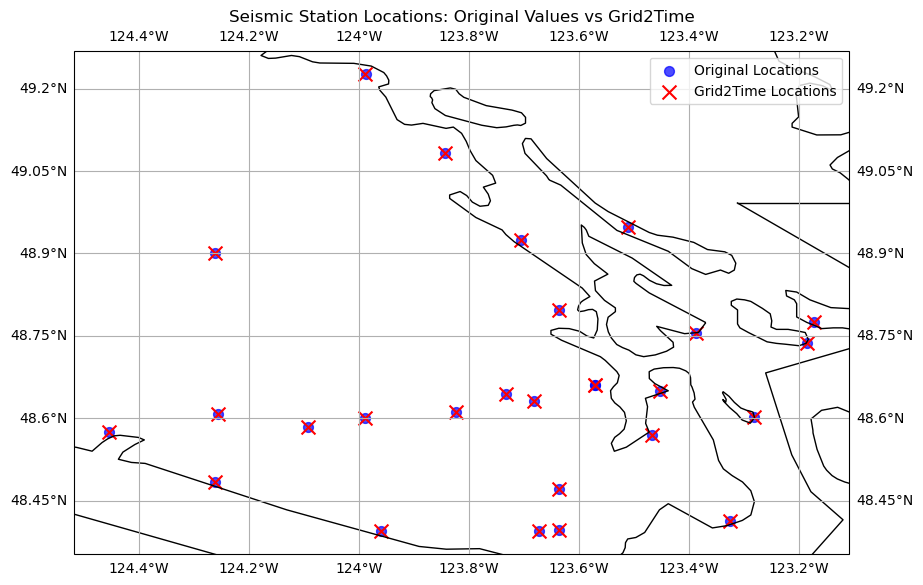

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure to compare both coordinates: original and projected
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS)
# Plot origin locations (lat_origin, lon_origin) as blue circles
ax.scatter(merged_df['lon_origin'], merged_df['lat_origin'], color='blue', label='Original Locations', 
           s=50, marker='o', alpha=0.7)
# Plot grid2time locations (lat_grid2time, lon_grid2time) as red x's
ax.scatter(merged_df['lon_grid2time'], merged_df['lat_grid2time'], color='red', label='Grid2Time Locations', 
           s=100, marker='x')
plt.legend()
plt.title('Seismic Station Locations: Original Values vs Grid2Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.gridlines(draw_labels=True)
plt.show()

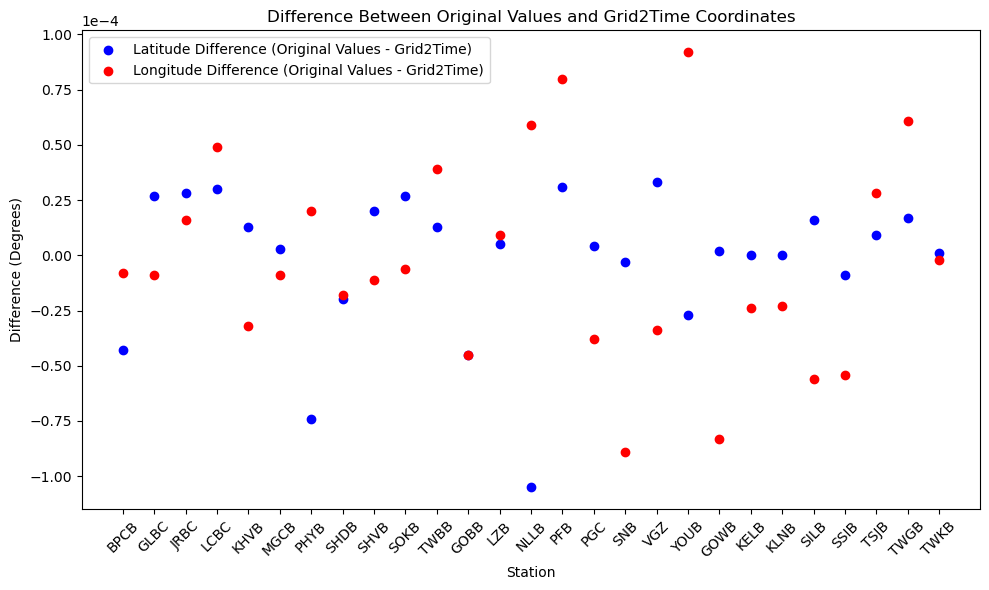

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Calculate differences for latitude and longitude
lat_diff = merged_df['lat_origin'] - merged_df['lat_grid2time']
lon_diff = merged_df['lon_origin'] - merged_df['lon_grid2time']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['sta'], lat_diff, color='blue', label='Latitude Difference (Original Values - Grid2Time)')
plt.scatter(merged_df['sta'], lon_diff, color='red', label='Longitude Difference (Original Values - Grid2Time)')
plt.xlabel('Station')
plt.ylabel('Difference (Degrees)')
plt.title('Difference Between Original Values and Grid2Time Coordinates')
plt.legend()
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.tight_layout()
plt.show()